In [7]:
%cd /Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/grocery
#%cd C:/Users/szdxl/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/grocery

/Users/pg/OneDrive/Duke Assigment/Job Seeking/Collection_DS_takehome_challenges/data/grocery


In [126]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import re



%matplotlib inline


%matplotlib inline

In [9]:
item_to_id = pd.read_csv('item_to_id.csv')
purchase_history = pd.read_csv('purchase_history.csv')

In [10]:
item_to_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [11]:
purchase_history.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


**Data Processing**

In [12]:
purchase_history['id'].str.split(',')[0:3]#.sum()

0                                   [27, 26]
1                                [6, 47, 17]
2    [18, 12, 23, 22, 27, 43, 38, 20, 35, 1]
Name: id, dtype: object

In [13]:
def item_counts_by_user(one_user_data):
    all_item_ids = one_user_data['id'].str.split(',').sum()
    return pd.Series(Counter(int(id) for id in all_item_ids))

#use of Counter: input a list out put a dic of count

In [14]:
user_item_count = purchase_history.groupby('user_id').apply(item_counts_by_user).unstack(fill_value = 0)
user_item_count.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
user_item_count[user_item_count.index == 308543]

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
308543,1,0,1,1,0,1,0,0,1,1,...,1,0,1,1,1,2,1,1,1,0


**Question 1: The customer who bought the most items overall in her lifetime**

In [16]:
user_item_count.sum(axis = 1).sort_values(ascending = False).head(1)
#so, the custoemr who bought most items overall is user 269335

user_id
269335    72
dtype: int64

**Question 2: For each item, the customer who bought that product the most**

In [17]:
q2 = user_item_count.apply(np.argmax, axis=0).reset_index()
q2 = q2.rename(columns = {'index': 'Item_id', 0 : 'user_id'})
q2.head()

/Users/pg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


,Item_id,user_id
0,1,31625
1,2,31625
2,3,154960
3,4,5289
4,5,217277


**Q3: Cluster items based on user co-purchase history. That is, create clusters of products that
have the highest probability of being bought together. The goal of this is to replace the
old/manually created categories with these new ones. Each item can belong to just one
cluster**

**Method1**

In [94]:

# build K-Means model
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(feature)
label = kmeans.predict(feature)

feature = user_item_count.T
feature.head()
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(feature)
pca_feature = pca.transform(feature)

In [88]:
clusters = range(2, 30)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_jobs=-1)
    kmeans = kmeans.fit(feature)
    label = kmeans.predict(feature)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(feature, label))

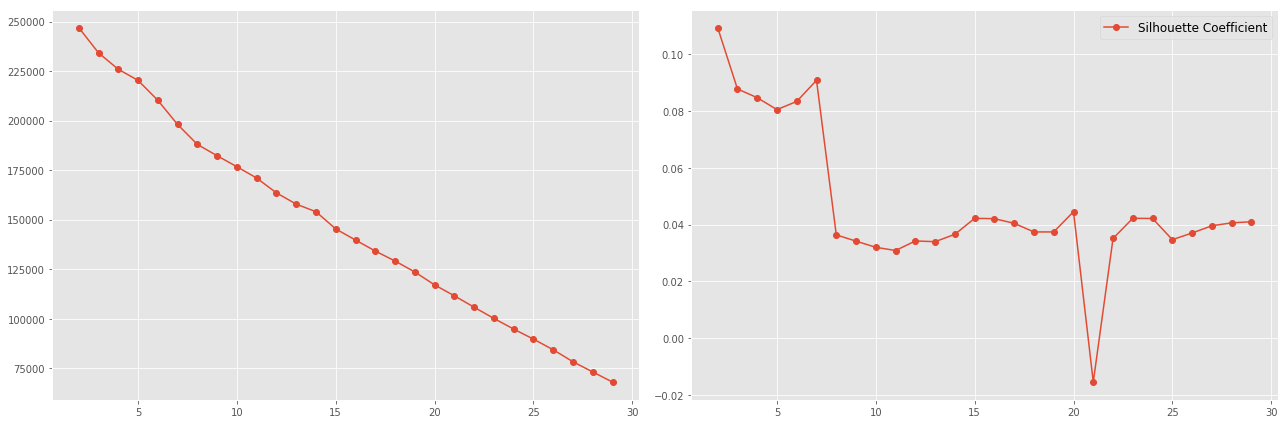

In [89]:

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

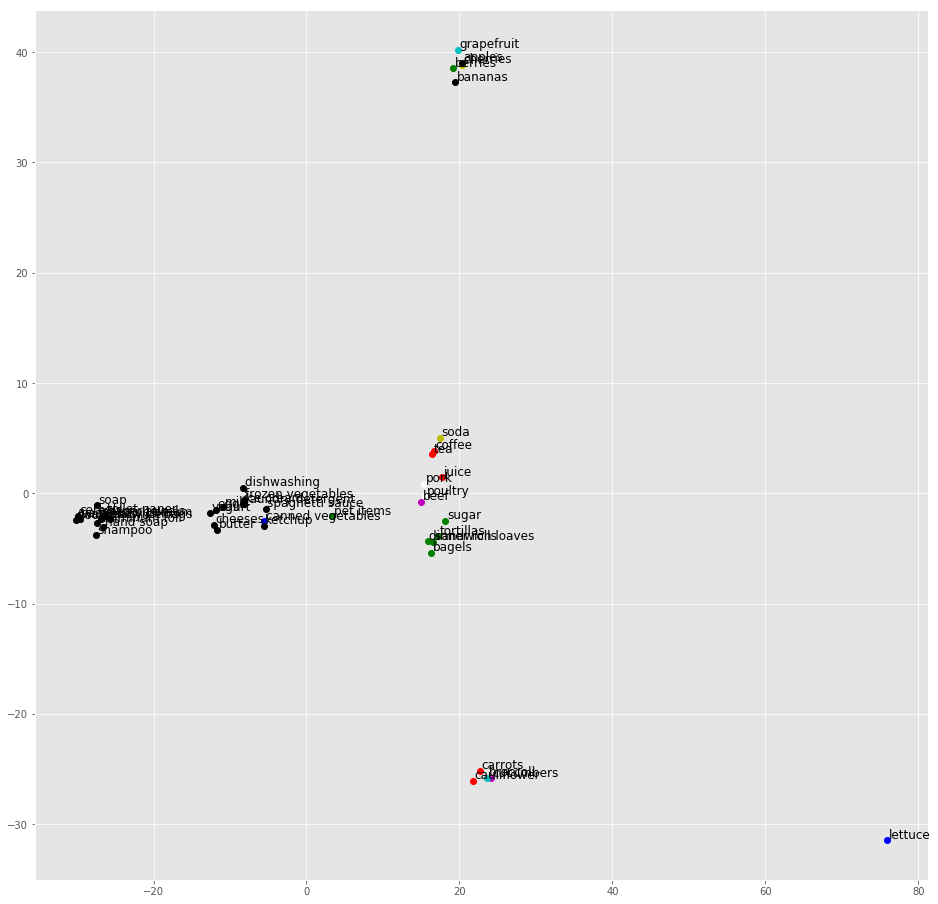

In [95]:

# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = item_to_id[item_to_id['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()

In [96]:

# print useful information
df = pd.DataFrame({'Item_id': list(range(1, 49)), 'label': label})
df = pd.merge(left=df, right=item_to_id, on='Item_id', how='left')

for i in range(0, 21):
    print(i, '\t', list(df[df['label'] == i]['Item_name']))

0 	 ['canned vegetables']
1 	 ['sugar', 'pet items', 'berries']
2 	 ['tea', 'juice', 'coffee']
3 	 ['grapefruit']
4 	 ['beef']
5 	 ['soda']
6 	 ['apples', 'bananas']
7 	 ['poultry', 'pork']
8 	 ['lettuce']
9 	 ['bagels', 'tortillas', 'dinner rolls', 'sandwich loaves']
10 	 ['carrots', 'cauliflower']
11 	 ['broccoli']
12 	 ['cucumbers']
13 	 ['cherries']
14 	 ['baby items', 'waffles', 'sandwich bags', 'butter', 'cereals', 'shampoo', 'eggs', 'aluminum foil', 'milk', 'laundry detergent', 'shaving cream', 'cheeses', 'frozen vegetables', 'paper towels', 'spaghetti sauce', 'dishwashing\xa0', 'hand soap', 'flour', 'pasta', 'toilet paper', 'soap', 'ice cream', 'ketchup', 'yogurt']
15 	 []
16 	 []
17 	 []
18 	 []
19 	 []
20 	 []


**Method 2**

In [100]:
A = normalize(user_item_count.values, axis=0)
item_item_similarity = A.T.dot(A)
item_item_similarity = pd.DataFrame(item_item_similarity,
                                    index=user_item_count.columns,
                                    columns=user_item_count.columns)

In [101]:
item_item_similarity

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269
6,0.388250,0.468199,0.358326,0.247414,0.233618,1.000000,0.267042,0.326704,0.385393,0.376518,...,0.376262,0.381924,0.338488,0.387834,0.382688,0.381860,0.390638,0.380686,0.496062,0.321075
7,0.271743,0.312200,0.238133,0.166012,0.164699,0.267042,1.000000,0.219365,0.256647,0.250765,...,0.249702,0.255744,0.229961,0.265111,0.250892,0.254311,0.255302,0.253011,0.253393,0.209766
8,0.335303,0.390521,0.301868,0.216166,0.203245,0.326704,0.219365,1.000000,0.319041,0.338472,...,0.320496,0.323186,0.279745,0.333141,0.313641,0.323224,0.327157,0.319095,0.320625,0.357460
9,0.403690,0.464872,0.362091,0.252662,0.239445,0.385393,0.256647,0.319041,1.000000,0.381207,...,0.375891,0.386393,0.334481,0.380174,0.486471,0.378158,0.376156,0.387666,0.380764,0.311454
10,0.390641,0.527894,0.352597,0.258313,0.234254,0.376518,0.250765,0.338472,0.381207,1.000000,...,0.381372,0.380613,0.333471,0.488734,0.372790,0.483275,0.483897,0.384714,0.381086,0.327807


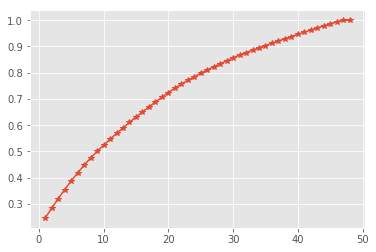

In [139]:
pca = PCA()
# rotate by PCA, making it easier to be visualized later
items_rotated = pca.fit_transform(item_item_similarity)
items_rotated = pd.DataFrame(items_rotated,
                             index=user_item_count.columns,
                             columns=["pc{}".format(index+1) for index in range(item_to_id.shape[0])])
explained_variance_by_k = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1,len(explained_variance_by_k)+1),explained_variance_by_k,marker="*")

In [120]:
items = item_to_id

In [121]:
def show_clusters(items_rotated,labels):
    """
    plot and print clustering result
    """
    fig = plt.figure(figsize=(15, 15))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])

    grps = items_rotated.groupby(labels)
    for label,grp in grps:
        plt.scatter(grp.pc1,grp.pc2,c=next(colors),label = label)

        print("*********** Label [{}] ***********".format(label))
        names = item_to_id.loc[ grp.index,"Item_name"]
        for index, name in enumerate(names):
            print("\t<{}> {}".format(index+1,name))

    # annotate
    for itemid in items_rotated.index:
        x = items_rotated.loc[itemid,"pc1"]
        y = items_rotated.loc[itemid,"pc2"]
        name = item_to_id.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)
        plt.text(x,y,name)

    # plt.legend(loc="best")

In [130]:
def cluster(n_clusters,n_components=48):
    print("first {} PC explain {:.1f}% variances".format(n_components,
                                                         100 * sum(pca.explained_variance_ratio_[:n_components])))

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(items_rotated.values[:, :n_components])

    # display results
    show_clusters(items_rotated, kmeans.labels_)

In [123]:
# choose best K (i.e., number of clusters)
inertias = []
silhouettes = []

ks = range(2,30)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(items_rotated)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(items_rotated, kmeans.predict(items_rotated)))

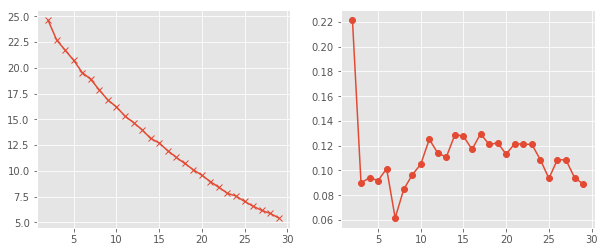

In [124]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
plt.plot(ks,inertias,marker='x')# want to use elbow method to find best k

fig.add_subplot(1,2,2)
plt.plot(ks,silhouettes,marker='o')# the higher the better

first 48 PC explain 100.0% variances
*********** Label [0] ***********
	<1> sugar
	<2> berries
*********** Label [1] ***********
	<1> juice
	<2> ketchup
	<3> shampoo
	<4> hand soap
	<5> shaving cream
*********** Label [2] ***********
	<1> eggs
	<2> pasta
	<3> grapefruit
	<4> lettuce
*********** Label [3] ***********
	<1> waffles
	<2> pork
	<3> carrots
	<4> aluminum foil
	<5> baby items
*********** Label [4] ***********
	<1> dinner rolls
	<2> cheeses
	<3> apples
	<4> broccoli
*********** Label [5] ***********
	<1> tea
	<2> soda
*********** Label [6] ***********
	<1> spaghetti sauce
	<2> poultry
	<3> paper towels
	<4> soap
*********** Label [7] ***********
	<1> bagels
	<2> butter
	<3> beef
	<4> cauliflower
*********** Label [8] ***********
	<1> bananas
	<2> cherries
	<3> sandwich bags
*********** Label [9] ***********
	<1> canned vegetables
	<2> yogurt
	<3> cereals
	<4> frozen vegetables
	<5> nan
*********** Label [10] ***********
	<1> milk
	<2> cucumbers
	<3> dishwashing 
	<4> toilet pa

/Users/pg/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


KeyError: 48

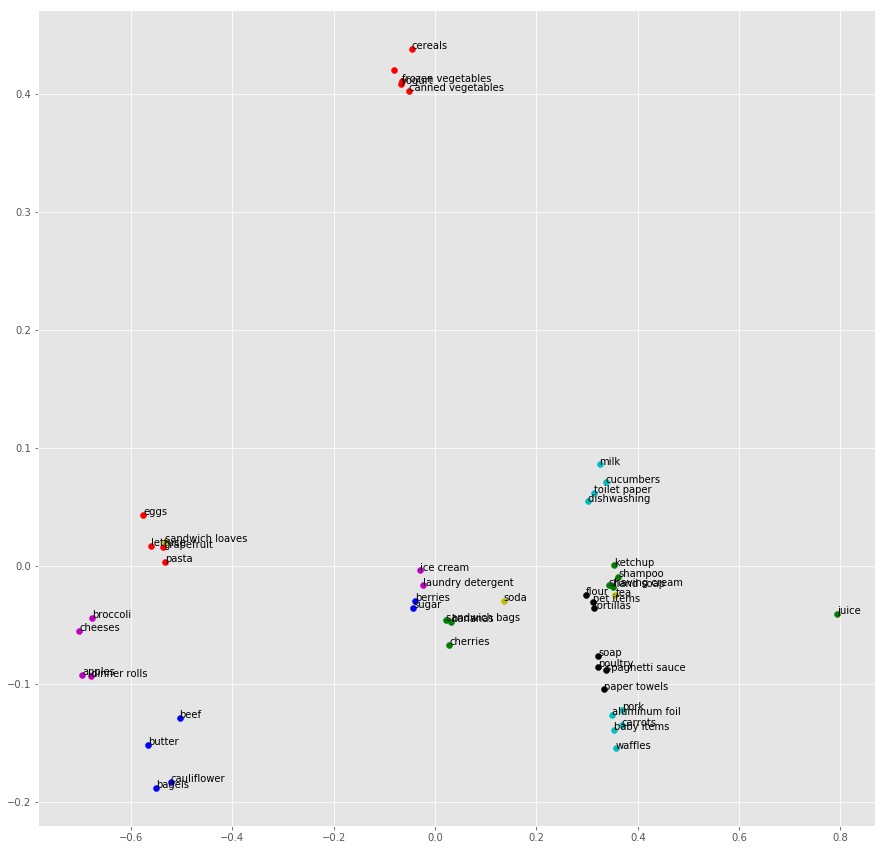

In [137]:
cluster(n_clusters=14)